In [1]:
import matplotlib.pyplot as plt
import os
import pandas as pd
from quantumpropagator import readWholeH5toDict, abs2
#from __future__ import print_function
from ipywidgets import interact#, interactive, fixed, interact_manual
import ipywidgets as widgets

def heatThisLog(h5File):
    wf  = qp.retrieve_hdf5_data(h5File,'WF')
    fig = plt.figure(figsize=(8, 16), dpi= 80, facecolor='w', edgecolor='k')
    plt.ylabel('Gamma')
    plt.xlabel('Theta')
    #plt.imshow(qp.abs2(wf), vmax = 1e-30)
    plt.imshow(np.log(qp.abs2(wf)))
    
def heatThis(h5File,save=None):
    save = save or False
    from mpl_toolkits.axes_grid1 import make_axes_locatable
    wf   = qp.retrieve_hdf5_data(h5File,'WF')
    time = qp.retrieve_hdf5_data(h5File,'Time')[0]
    fig = plt.figure(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')
    plt.title('Time = {:10.5f} fs'.format(time))
    plt.ylabel('Gamma')
    plt.xlabel('Theta')
    #plt.gca().set_yticks(gams)
    #plt.gca().set_yticklabels(gams)
    #plt.gca().set_xticks(thes)
    #plt.gca().set_xticklabels(thes)

    #plt.imshow(qp.abs2(wf), vmax = 1e-30)
    #plt.imshow(qp.abs2(wf), cmap='PuBu_r')
    
    # this is to get a nice colorbar on the side
    ax = plt.gca()
    im = ax.imshow(qp.abs2(wf), cmap='hot', vmax=0.01)
    #im = ax.imshow(qp.abs2(wf), cmap='PuBu_r', vmax=0.4)
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)

    plt.colorbar(im, cax=cax)
    
    if save:
        fig.savefig(os.path.splitext(h5File)[0] + '.png')
        plt.close()
    
def f(x):
    return heatThis(os.path.join(a,filesList[x]))

In [2]:
subfolders = sorted([ dir for dir in os.listdir('.') if os.path.isdir(dir) and dir != '.ipynb_checkpoints'])
print(''.join(['{} -> {}\n'.format(a,b) for a,b in enumerate(subfolders)]))

0 -> input_FinerGrid_0000



In [3]:
a = subfolders[0]

In [4]:
filesList = [ fn for fn in sorted(os.listdir(a)) if fn[:8] == 'Gaussian' and fn[-3:] == '.h5']
outh5 = os.path.join(a,'allInput.h5')
dictio = readWholeH5toDict(outh5)
gams,thes = dictio['gams'],dictio['thes']

In [5]:
lastV = len(filesList)-1
interact(f, x = widgets.IntSlider(min=0,max=lastV,step=1,value=lastV));
createimages = False

if createimages:
    for filn in filesList:
        filna = os.path.join(a,filn)
        heatThis(filna,save=True)
        

interactive(children=(IntSlider(value=1050, description='x', max=1050), Output()), _dom_classes=('widget-inter…

# 1d slices

In [6]:
gamL,theL = (qp.retrieve_hdf5_data(os.path.join(a,filesList[0]),'WF')).shape

In [7]:
def sliceGammas(h5File, gamma):
    wf  = qp.retrieve_hdf5_data(h5File,'WF')
    fig = plt.figure(figsize=(11, 6), dpi= 80, facecolor='w', edgecolor='k')
    ys = wf[gamma,:]
    time = qp.retrieve_hdf5_data(h5File,'Time')[0]
    plt.title('Time = {:10.5f} fs --- gammaL = {}'.format(time,gamma))
    plt.ylim(-0.5,0.5)
    plt.plot(thes, np.real(ys), linewidth=1,ls='--')
    plt.plot(thes, np.imag(ys), linewidth=1,ls='--')
    plt.plot(thes, abs2(ys), linewidth=3,ls='-')

def sliceThetas(h5File, theta):
    wf  = qp.retrieve_hdf5_data(h5File,'WF')
    fig = plt.figure(figsize=(11, 6), dpi= 80, facecolor='w', edgecolor='k')
    ys = wf[:,theta]
    time = qp.retrieve_hdf5_data(h5File,'Time')[0]
    plt.title('Time = {:10.5f} fs --- thetaL = {}'.format(time,theta))
    plt.ylim(-0.5,0.5)
    plt.plot(gams, np.real(ys), linewidth=1,ls='--')
    plt.plot(gams, np.imag(ys), linewidth=1,ls='--')
    plt.plot(gams, abs2(ys), linewidth=3,ls='-')    
    
def fgam(file_number,gamma):
    return sliceGammas(os.path.join(a, filesList[file_number]), gamma)

def fthe(file_number,theta):
    return sliceThetas(os.path.join(a, filesList[file_number]), theta)

In [8]:
interact(fgam, file_number = widgets.IntSlider(min=0,max=lastV,step=1,value=lastV), gamma = widgets.IntSlider(min=0,max=gamL-1,step=1,value=10));

interactive(children=(IntSlider(value=1050, description='file_number', max=1050), IntSlider(value=10, descript…

In [9]:
interact(fthe, file_number = widgets.IntSlider(min=0,max=lastV,step=1,value=lastV), theta = widgets.IntSlider(min=0,max=theL-1,step=1,value=16));

interactive(children=(IntSlider(value=1050, description='file_number', max=1050), IntSlider(value=16, descript…

In [10]:
outfn = os.path.join(a,'output')

In [11]:
data = pd.read_csv(outfn, delim_whitespace=True, header=None);
data.head()

,0,1,2,3,4,5,6
0,0,0.000000,0.743155,4.979338e-08,0.000073,0.000073,0.000000e+00
1,1000,10.009927,0.743156,1.986163e-07,0.000073,0.000073,3.920136e-10
2,2000,20.019855,0.743156,5.327776e-07,0.000072,0.000073,8.772731e-10
3,3000,30.029782,0.743156,8.219537e-07,0.000072,0.000073,8.354817e-10
4,4000,40.039709,0.743156,9.811288e-07,0.000072,0.000073,5.072023e-10


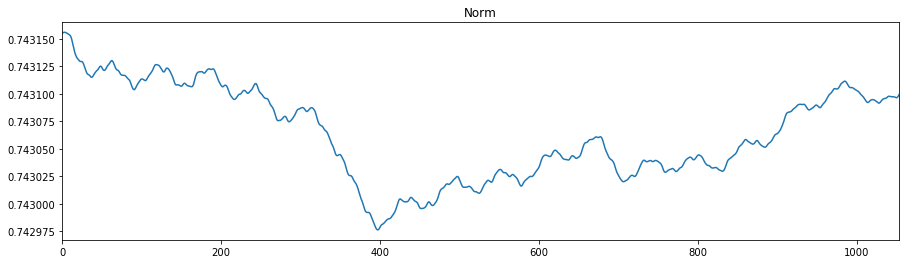

In [12]:
data[2].plot(title = 'Norm', figsize=(15,4));

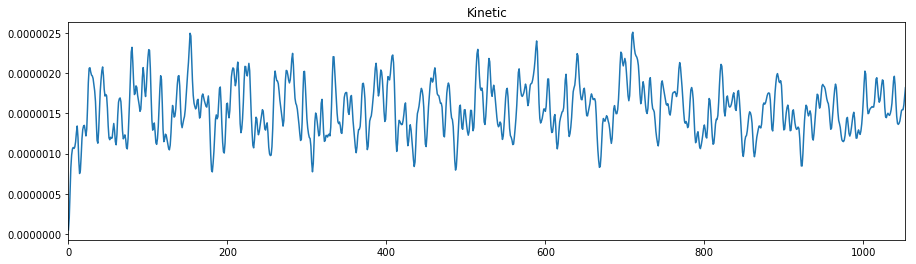

In [13]:
data[3].plot(title = 'Kinetic', figsize=(15,4));

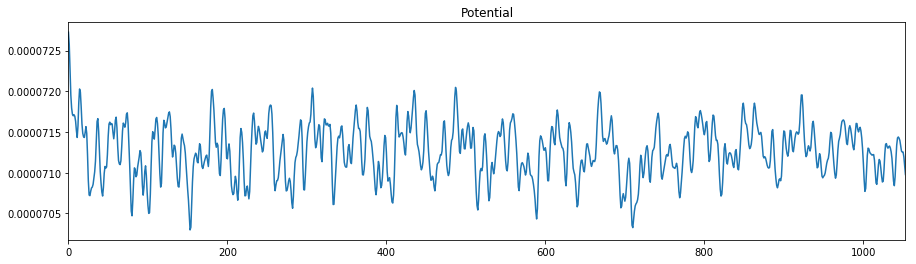

In [14]:
data[4].plot(title = 'Potential', figsize=(15,4));

### Expected values

In [15]:
def expected(h5file):
    wf  = qp.retrieve_hdf5_data(h5file,'WF')
    gamAvg = sum(np.sum(abs2(wf),axis=1) * gams)
    theAvg = sum(np.sum(abs2(wf),axis=0) * thes)
    print('Expected Values:\nTheta: {:10.3f} \nGamma: {:10.3f}'.format(gamAvg, theAvg))

def fexp(x):
    return expected(os.path.join(a,filesList[x]))

In [16]:
interact(fexp, x = widgets.IntSlider(min=0,max=lastV,step=1,value=lastV));

interactive(children=(IntSlider(value=1050, description='x', max=1050), Output()), _dom_classes=('widget-inter…

# Initial condition differences

In [17]:
# filesList

In [18]:
wf0  = qp.retrieve_hdf5_data(os.path.join(a,filesList[0]),'WF')
wf1  = qp.retrieve_hdf5_data(os.path.join(a,filesList[1]),'WF')

In [19]:
wfdiff = wf1-wf0

In [20]:
%matplotlib notebook
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import cm

def plotWF(wf):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    X,Y = np.meshgrid(thes, gams)

    ax.plot_wireframe(X, Y, wf.real, alpha=0.3)
    ax.plot_wireframe(X, Y, wf.imag, alpha=0.2, color='orange')
#cset = ax.contour(X, Y, what, zdir='z', offset=-0.000015, cmap=cm.coolwarm)
#cset = ax.contour(X, Y, what, zdir='x', offset=80, cmap=cm.coolwarm)
#cset = ax.contour(X, Y, what, zdir='y',offset=20, cmap=cm.coolwarm)

<IPython.core.display.Javascript object>


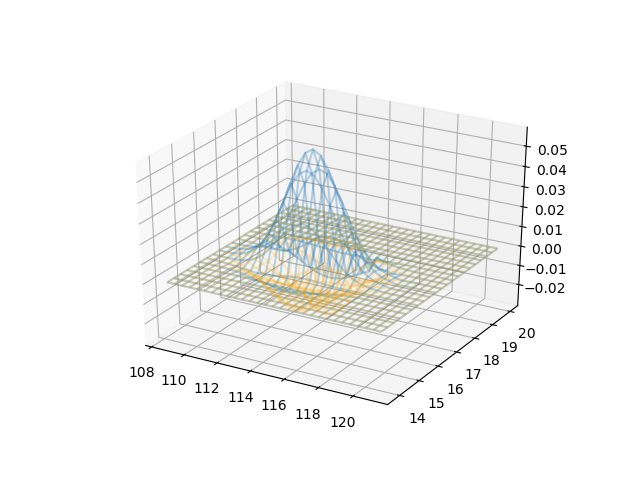

In [21]:
plotWF(wf1)

<IPython.core.display.Javascript object>


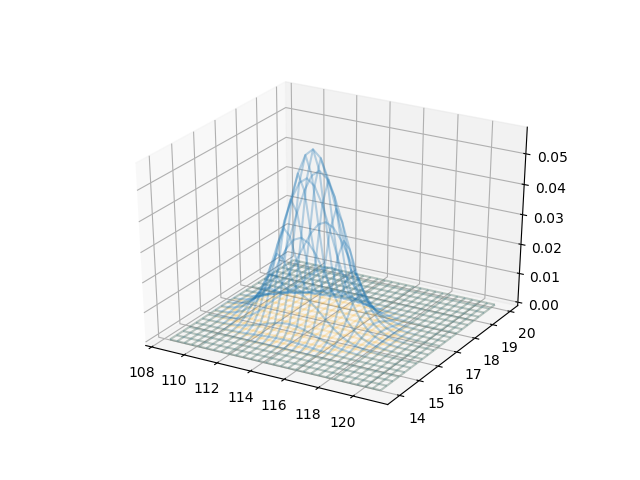

In [22]:
plotWF(wf0)

<IPython.core.display.Javascript object>


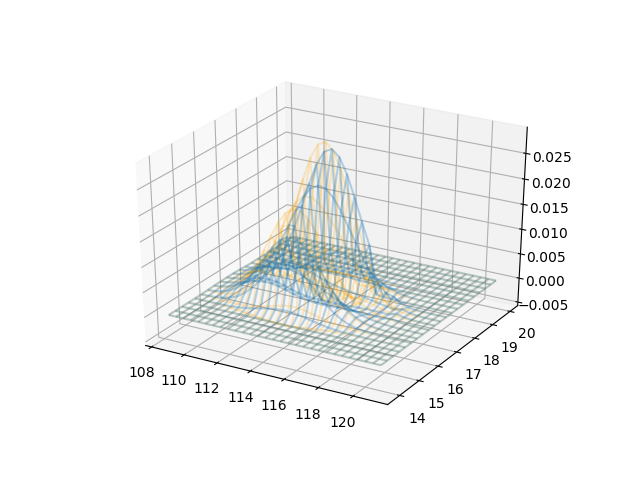

In [23]:
plotWF(wf0-wf1)